In [27]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [30]:
img = cv2.imread('./Test_img/2.jpg')
img.shape

(993, 1324, 3)

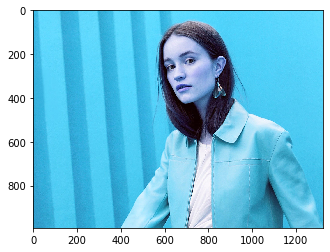

In [33]:
plt.imshow(img)

In [36]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(993, 1324)

In [39]:
gray

array([[181, 181, 180, ..., 218, 218, 218],
       [180, 181, 181, ..., 218, 218, 218],
       [180, 181, 183, ..., 218, 218, 218],
       ...,
       [188, 182, 179, ..., 204, 201, 197],
       [188, 184, 181, ..., 204, 202, 198],
       [189, 185, 175, ..., 199, 197, 197]], dtype=uint8)

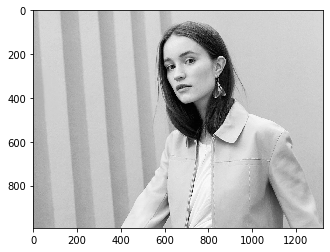

In [42]:
plt.imshow(gray, cmap='gray')

In [43]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[541, 119, 300, 300]], dtype=int32)

In [45]:
(x,y,w,h) = faces[0]
x,y,w,h

(541, 119, 300, 300)

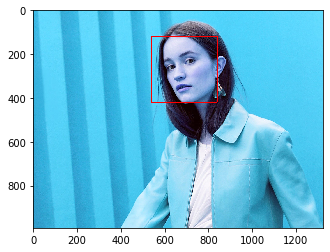

In [47]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
plt.imshow(face_img)

<function matplotlib.pyplot.show(*args, **kw)>

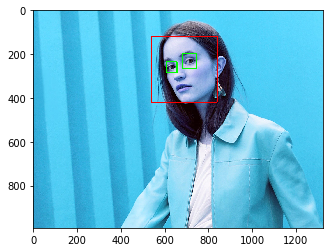

In [49]:
cv2.destroyAllWindows()
for(x,y,w,h) in faces:
    face_img  =cv2.rectangle(img,(x,y),(x+w, y+h),(250,0,0),3)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh)in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),3)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show

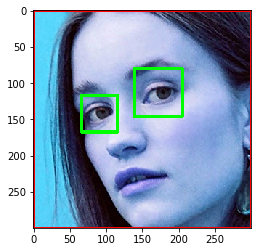

In [51]:
plt.imshow(roi_color, cmap='gray')

In [53]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for(x,y,w,h) in faces:
        roi_gray  = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

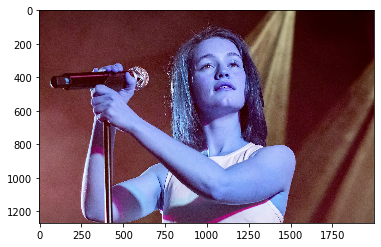

In [55]:
orig_img = cv2.imread('./Test_img/1.jpg')
plt.imshow(orig_img)

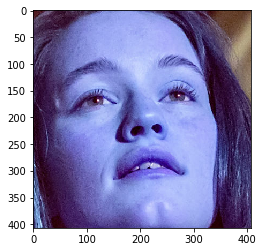

In [57]:
crop_img = get_cropped_image_if_2_eyes('./Test_img/1.jpg')
plt.imshow(crop_img)

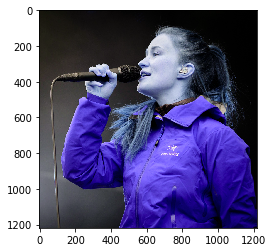

In [59]:
orig_img2 = cv2.imread('./Test_img/3.jpg')
plt.imshow(orig_img2)

In [61]:
crop_img2 = get_cropped_image_if_2_eyes('./Test_img/3.jpg')
crop_img2

In [63]:
path_to_data = "./Dataset/"
path_to_cr_data = "./Cropped/"

In [65]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [67]:
img_dirs

['./Dataset/Alexandra Daddario',
 './Dataset/Alexandria Ocasio-Cortez',
 './Dataset/APJ Abdul Kalam',
 './Dataset/Elon Musk',
 './Dataset/JK Rowling',
 './Dataset/Johnny Depp',
 './Dataset/Selena Gomez']

In [69]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [71]:
cropped_image_dirs = []
person_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    person_name = img_dir.split('/')[-1]
    print(person_name)
    
    person_file_names_dict[person_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            crop_folder = path_to_cr_data + person_name
            if not os.path.exists(crop_folder):
                os.makedirs(crop_folder)
                cropped_image_dirs.append(crop_folder)
                print("Generating Cropped images in folder: ", crop_folder)
            
            cropped_file_name = person_name + str(count) + ".png"
            cropped_file_path = crop_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            person_file_names_dict[person_name].append(cropped_file_path)
            count += 1
    print(" ... Generation Completed ... ")   

Alexandra Daddario
Generating Cropped images in folder:  ./Cropped/Alexandra Daddario
 ... Generation Completed ... 
Alexandria Ocasio-Cortez
Generating Cropped images in folder:  ./Cropped/Alexandria Ocasio-Cortez
 ... Generation Completed ... 
APJ Abdul Kalam
Generating Cropped images in folder:  ./Cropped/APJ Abdul Kalam
 ... Generation Completed ... 
Elon Musk
Generating Cropped images in folder:  ./Cropped/Elon Musk
 ... Generation Completed ... 
JK Rowling
Generating Cropped images in folder:  ./Cropped/JK Rowling
 ... Generation Completed ... 
Johnny Depp
Generating Cropped images in folder:  ./Cropped/Johnny Depp
 ... Generation Completed ... 
Selena Gomez
Generating Cropped images in folder:  ./Cropped/Selena Gomez
 ... Generation Completed ... 


In [72]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    
    #Datatype conversions convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

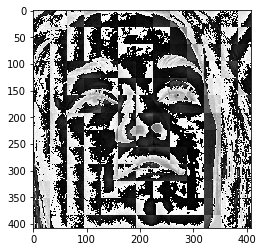

In [73]:
im_har = w2d(crop_img, 'db1', 5)
plt.imshow(im_har, cmap='gray')

In [81]:
person_file_names_dict = {}
for img_dir in cropped_image_dirs:
    person_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    person_file_names_dict[person_name] = file_list
person_file_names_dict

{'Alexandra Daddario': ['./Cropped/Alexandra Daddario\\Alexandra Daddario1.png',
  './Cropped/Alexandra Daddario\\Alexandra Daddario100.png',
  './Cropped/Alexandra Daddario\\Alexandra Daddario11.png',
  './Cropped/Alexandra Daddario\\Alexandra Daddario12.png',
  './Cropped/Alexandra Daddario\\Alexandra Daddario13.png',
  './Cropped/Alexandra Daddario\\Alexandra Daddario14.png',
  './Cropped/Alexandra Daddario\\Alexandra Daddario15.png',
  './Cropped/Alexandra Daddario\\Alexandra Daddario16.png',
  './Cropped/Alexandra Daddario\\Alexandra Daddario17.png',
  './Cropped/Alexandra Daddario\\Alexandra Daddario18.png',
  './Cropped/Alexandra Daddario\\Alexandra Daddario19.png',
  './Cropped/Alexandra Daddario\\Alexandra Daddario2.png',
  './Cropped/Alexandra Daddario\\Alexandra Daddario20.png',
  './Cropped/Alexandra Daddario\\Alexandra Daddario21.png',
  './Cropped/Alexandra Daddario\\Alexandra Daddario23.png',
  './Cropped/Alexandra Daddario\\Alexandra Daddario24.png',
  './Cropped/Alexan

In [82]:
class_dict = {}
count = 0
for person_name in person_file_names_dict.keys():
    class_dict[person_name] = count
    count += 1
class_dict

{'Alexandra Daddario': 0,
 'Alexandria Ocasio-Cortez': 1,
 'APJ Abdul Kalam': 2,
 'Elon Musk': 3,
 'JK Rowling': 4,
 'Johnny Depp': 5,
 'Selena Gomez': 6}

In [83]:
x = []
y = []

for person_name, train_files in person_file_names_dict.items():
    for train_img in train_files:
        img = cv2.imread(train_img)
        if img is None:
            continue
        scale_raw_img = cv2.resize(img, (32,32))
        img_har = w2d(img, 'db1', 5)
        scale_har_img = cv2.resize(img_har, (32,32))
        combined_img = np.vstack((scale_raw_img.reshape(32*32*3,1),scale_har_img.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[person_name])        

In [84]:
len(x[0])

4096

In [85]:
32*32*3 + 32*32

4096

In [86]:
len(x)

575

In [87]:
x = np.array(x).reshape(len(x),4096).astype(float)
x.shape

(575, 4096)

In [89]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state = 0)

pipe=Pipeline([('scaler', StandardScaler()),('svc', SVC(kernel='rbf', C=10))])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.7398843930635838

In [102]:
len(x_test)

173

In [103]:
print(classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.62      0.59      0.60        22
           1       0.58      0.84      0.69        25
           2       1.00      0.20      0.33        10
           3       0.65      0.83      0.73        18
           4       0.84      0.93      0.88        45
           5       0.93      0.72      0.81        18
           6       0.81      0.63      0.71        35

    accuracy                           0.74       173
   macro avg       0.78      0.68      0.68       173
weighted avg       0.77      0.74      0.73       173



In [104]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [106]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [108]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df  

D:\Softwares\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\Softwares\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\Softwares\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,model,best_score,best_params
0,svm,0.756219,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.490050,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.771144,{'logisticregression__C': 1}


In [109]:
best_estimators

{'svm': Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('svc',
                  SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                      decision_function_shape='ovr', degree=3, gamma='auto',
                      kernel='linear', max_iter=-1, probability=True,
                      random_state=None, shrinking=True, tol=0.001,
                      verbose=False))],
          verbose=False), 'random_forest': Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('randomforestclassifier',
                  RandomForestClassifier(bootstrap=True, class_weight=None,
                                         criterion='gini', max_depth=None,
                                         max_features='auto',
                                         max_leaf_nodes=None,
       

In [110]:
best_estimators['svm']

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='auto',
                     kernel='linear', max_iter=-1, probability=True,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [111]:
best_estimators['logistic_regression']

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='liblinear', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [112]:
best_estimators['svm'].score(x_test, y_test)

0.7976878612716763

In [114]:
best_estimators['logistic_regression'].score(x_test, y_test)

0.8208092485549133

In [116]:
best_estimators['random_forest'].score(x_test, y_test)

0.5086705202312138

In [117]:
best_clf = best_estimators['logistic_regression']

In [118]:
from  sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[18,  1,  0,  1,  0,  0,  2],
       [ 0, 20,  1,  1,  0,  0,  3],
       [ 0,  1,  6,  2,  0,  1,  0],
       [ 0,  1,  0, 17,  0,  0,  0],
       [ 0,  1,  0,  0, 41,  1,  2],
       [ 0,  0,  0,  2,  1, 14,  1],
       [ 3,  4,  0,  0,  2,  0, 26]], dtype=int64)

Text(69.0, 0.5, 'Truth')

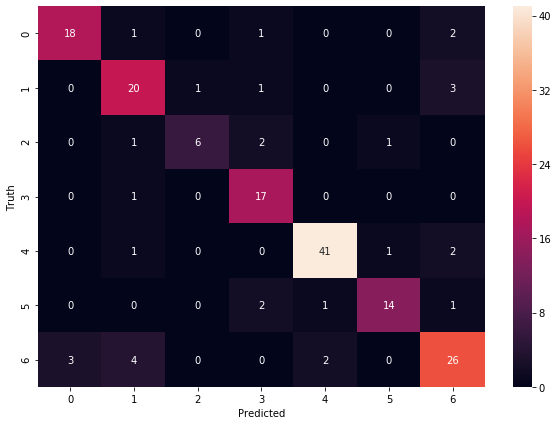

In [124]:
import seaborn as sn
plt.figure(figsize = (10,7))
ax = sn.heatmap(cm, annot = True)
b, t = ax.get_ylim()
ax.set_ylim(b+0.5, t-0.5)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [125]:
class_dict

{'Alexandra Daddario': 0,
 'Alexandria Ocasio-Cortez': 1,
 'APJ Abdul Kalam': 2,
 'Elon Musk': 3,
 'JK Rowling': 4,
 'Johnny Depp': 5,
 'Selena Gomez': 6}

In [126]:
!pip install joblib
import joblib

joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [127]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))